<a href="https://colab.research.google.com/github/annsftrmdhn/annsftrmdhn/blob/master/EDM_CHALLENGE_Kelompok_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌟 **EDM CHALLENGE** 🌟
### 📝 Dataset Title: Airism 📝


Dataset ini berisi informasi mengenai faktor-faktor yang berpotensi mempengaruhi kesejahteraan mental individu, khususnya terkait dengan tekanan akademik, tekanan kerja, dan kondisi psikologis. Data mencakup berbagai atribut yang dapat digunakan untuk menganalisis hubungan antara faktor lingkungan, kebiasaan hidup, dan kesehatan mental.

### 📊 Deskripsi Kolom 📊

| Kolom | Deskripsi |
| :--- | :--- |
| **id** | Identifikasi unik untuk setiap individu dalam dataset. |
| **Name** | Nama individu (dianonimkan untuk menjaga privasi). |
| **Gender** | Jenis kelamin individu. |
| **Age** | Usia individu dalam tahun. |
| **City** | Kota tempat individu tinggal. |
| **Working Professional or Student**| Status individu, apakah seorang mahasiswa atau pekerja profesional. |
| **Profession** | Jenis profesi bagi individu yang bekerja. |
| **Academic Pressure** | Tingkat tekanan akademik yang dialami oleh mahasiswa. |
| **Work Pressure** | Tingkat tekanan kerja yang dialami oleh pekerja profesional. |
| **CGPA** | Indeks Prestasi Kumulatif (*Cumulative Grade Point Average*) sebagai indikator akademik bagi mahasiswa. |
| **Study Satisfaction** | Tingkat kepuasan individu terhadap studi mereka. |
| **Job Satisfaction** | Tingkat kepuasan individu terhadap pekerjaannya. |
| **Sleep Duration** | Rata-rata durasi tidur individu per hari (dalam jam). |
| **Dietary Habits** | Kebiasaan pola makan individu. |
| **Degree** | Jenis gelar pendidikan yang sedang atau telah ditempuh oleh individu. |
| **Have you ever had suicidal thoughts?**| Indikator apakah individu pernah mengalami pikiran untuk bunuh diri. |
| **Work/Study Hours** | Jumlah jam kerja atau jam belajar individu per hari. |
| **Financial Stress** | Tingkat stres yang dialami individu akibat masalah keuangan. |
| **Family History of Mental Illness**| Indikator apakah individu memiliki riwayat keluarga dengan gangguan mental. |
| **Depression** | Indikator apakah individu mengalami depresi atau tidak. |

> ### **Loading data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib

In [ ]:
data = pd.read_csv('airtable.csv')
data.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,2023-06-25 23:04:16,United States,NaN,Unknown
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,2023-06-22 14:23:40,United States,NaN,Unknown
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,2023-06-24 03:48:00,United States,300.0,Unknown
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,2023-06-22 00:19:03,United States,200.0,Unknown
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,2023-06-23 15:38:59,United States,75.0,Unknown


> ### **Data Preparation**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [ ]:
data.isnull().sum()

,0
Company,0
Location_HQ,0
Industry,0
Percentage,919
Date,0
Source,0
Funds_Raised,272
Stage,0
Date_Added,0
Country,0


In [ ]:
data['Percentage'] = data['Percentage'].fillna(data['Percentage'].median())
data['Funds_Raised'] = data['Funds_Raised'].fillna(data['Funds_Raised'].median())
data['Laid_Off_Count'] = data['Laid_Off_Count'].fillna(0)

data = data.dropna(subset=['List_of_Employees_Laid_Off'])

>  ### **Exploratory Data Analysis (EDA)**

In [ ]:
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2737 entries, 0 to 2737
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Company                     2737 non-null   object        
 1   Location_HQ                 2737 non-null   object        
 2   Industry                    2737 non-null   object        
 3   Percentage                  2737 non-null   float64       
 4   Date                        2737 non-null   datetime64[ns]
 5   Source                      2737 non-null   object        
 6   Funds_Raised                2737 non-null   float64       
 7   Stage                       2737 non-null   object        
 8   Date_Added                  2737 non-null   object        
 9   Country                     2737 non-null   object        
 10  Laid_Off_Count              2737 non-null   float64       
 11  List_of_Employees_Laid_Off  2737 non-null   object        
 1

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off,month,year
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,2023-06-25 23:04:16,United States,0.0,Unknown,6,2023
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,2023-06-22 14:23:40,United States,0.0,Unknown,6,2023
2,Anaplan,SF Bay Area,Other,0.17,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,2023-06-24 03:48:00,United States,300.0,Unknown,6,2023
3,Uber,SF Bay Area,Transportation,0.17,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,2023-06-22 00:19:03,United States,200.0,Unknown,6,2023
4,Tackle.io,Boise,Infrastructure,0.17,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,2023-06-23 15:38:59,United States,75.0,Unknown,6,2023


<Axes: >

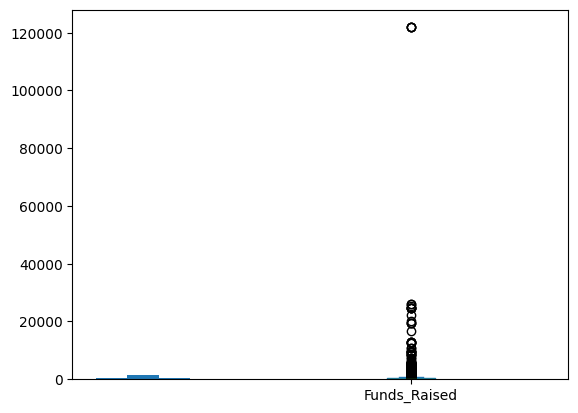

In [ ]:
data['Percentage'].hist()
data['Funds_Raised'].plot(kind='box')

<Axes: xlabel='Funds_Raised', ylabel='Percentage'>

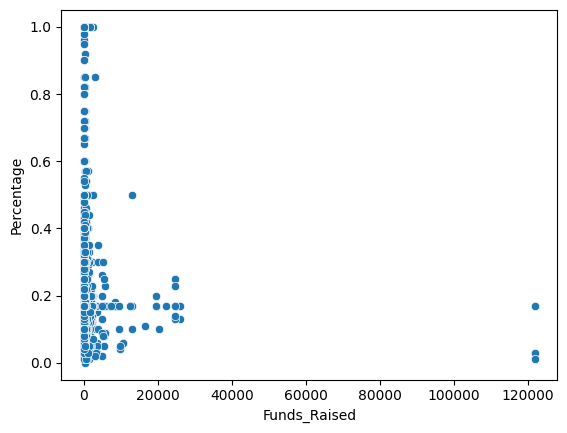

In [ ]:
import seaborn as sns
sns.scatterplot(x='Funds_Raised', y='Percentage', data=data)


In [ ]:
print(data.columns.tolist())


['Company', 'Location_HQ', 'Industry', 'Percentage', 'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country', 'Laid_Off_Count', 'List_of_Employees_Laid_Off', 'month', 'year']


In [ ]:
print(data['Laid_Off_Count'].unique())

[0.000e+00 3.000e+02 2.000e+02 7.500e+01 3.800e+01 1.000e+03 8.000e+02
 4.800e+01 1.700e+02 2.700e+02 1.000e+02 4.500e+01 9.000e+02 1.300e+02
 1.020e+02 8.100e+01 8.000e+01 8.000e+00 4.000e+02 1.280e+02 6.000e+01
 1.860e+02 1.550e+02 1.400e+02 2.960e+02 7.900e+01 3.900e+01 1.960e+02
 1.340e+02 9.000e+01 5.000e+01 6.000e+00 1.200e+02 2.800e+02 1.600e+02
 3.200e+02 4.000e+01 3.000e+01 5.300e+01 1.800e+02 3.500e+01 1.720e+02
 6.200e+01 6.300e+01 3.000e+03 4.200e+02 3.400e+02 2.000e+01 2.500e+02
 9.700e+01 1.580e+02 7.000e+01 5.800e+01 2.900e+02 7.160e+02 5.000e+00
 2.510e+02 2.300e+03 1.100e+03 6.000e+02 1.370e+02 2.700e+01 2.200e+01
 3.400e+01 1.770e+02 3.260e+02 7.100e+01 2.800e+01 5.000e+02 8.500e+01
 4.300e+01 2.900e+01 1.150e+02 8.000e+03 7.600e+02 1.072e+03 7.400e+01
 7.800e+01 4.700e+01 6.230e+02 1.120e+02 5.600e+02 1.600e+01 1.700e+01
 5.900e+01 2.010e+02 1.000e+01 1.500e+02 4.100e+01 9.900e+01 1.350e+02
 1.500e+01 8.900e+01 1.900e+01 7.800e+02 4.800e+02 2.300e+01 1.300e+03
 1.190

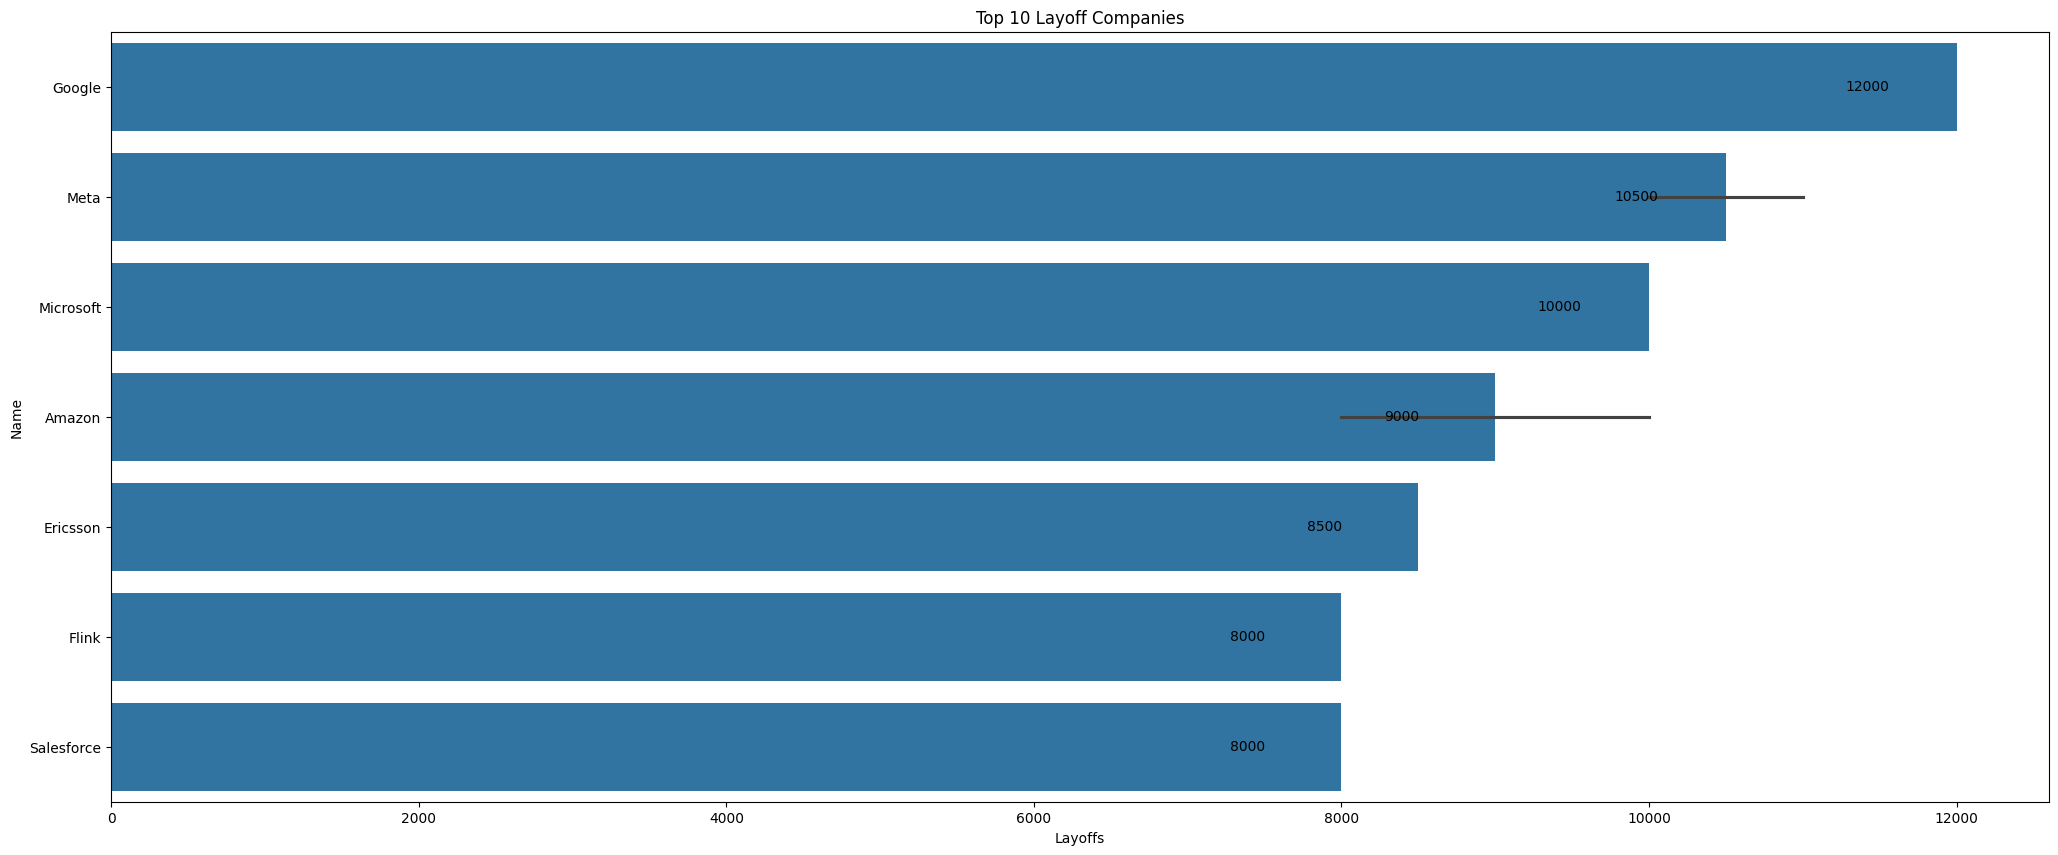

In [ ]:
top_10 = data.sort_values('Laid_Off_Count',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25, 10))
p=sns.barplot(x="Laid_Off_Count", y="Company", data=top_10,
              ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-80)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Layoffs')
plt.ylabel('Name')
plt.show()

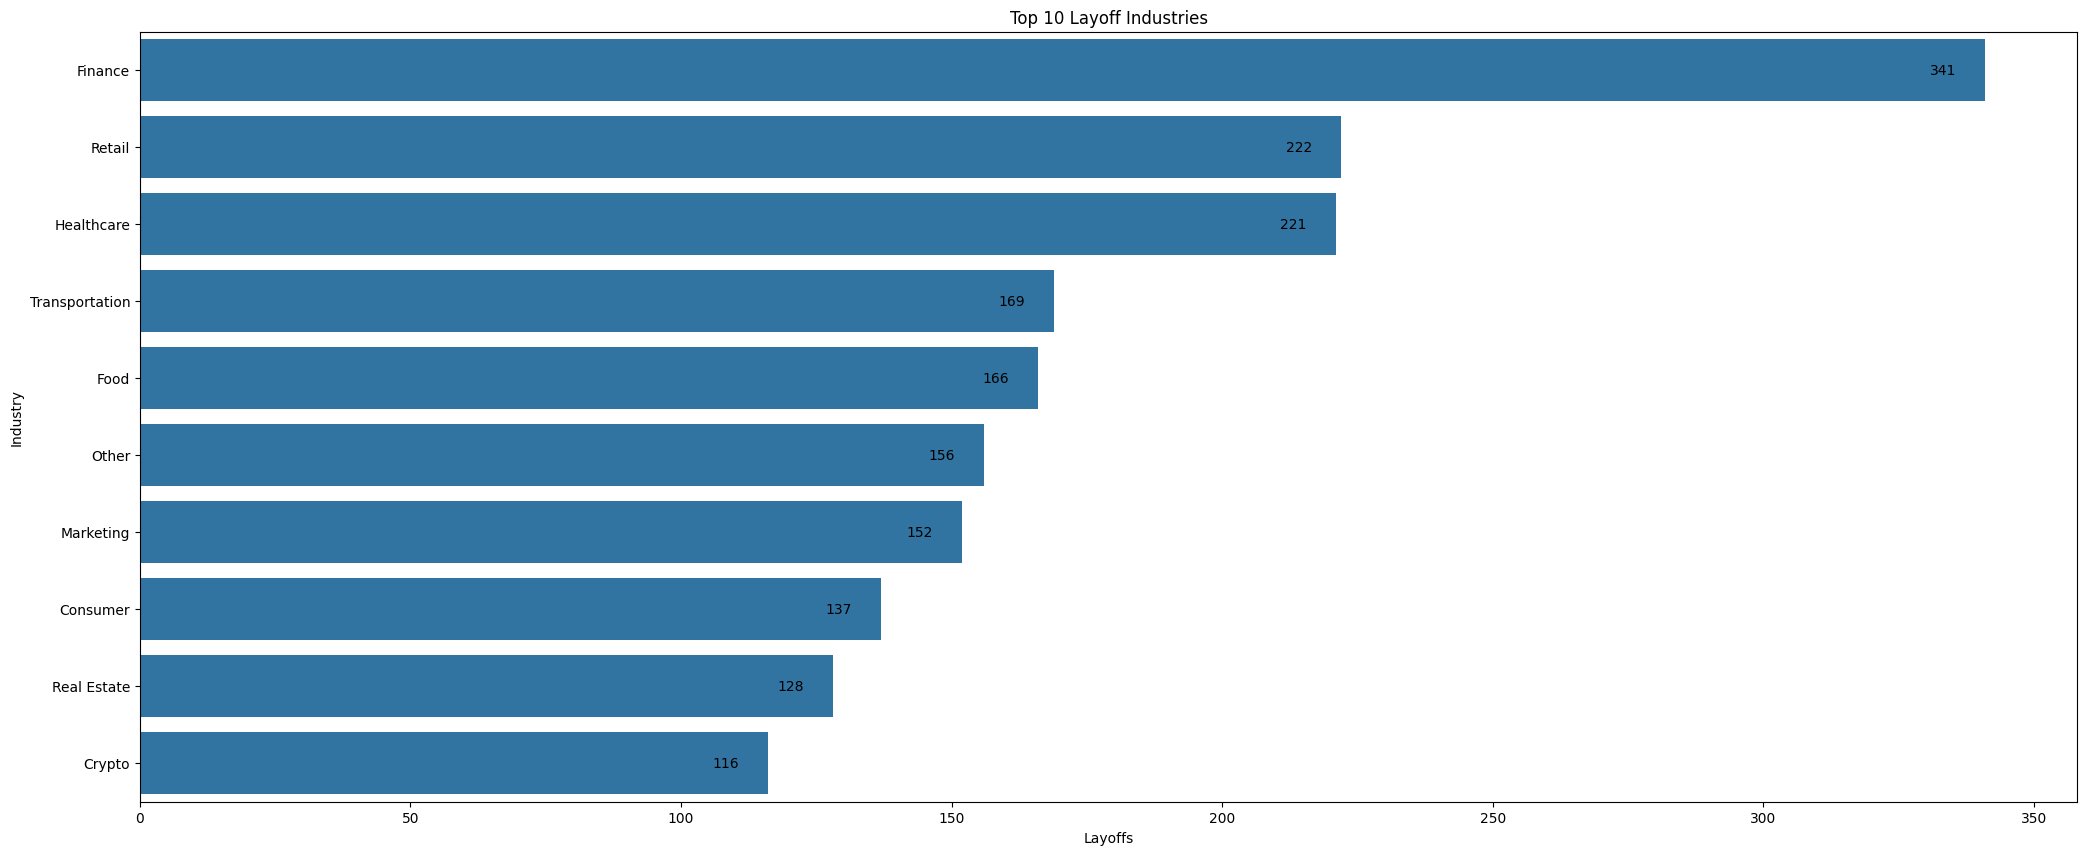

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
top_10_industries = data['Industry'].value_counts().head(10)
top_10_industries = data.groupby('Industry').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()
p=sns.barplot(y='Industry',x=0, data=top_10_industries,ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-40)
plt.title("Top 10 Layoff Industries")
plt.xlabel('Layoffs')
plt.ylabel('Industry')
plt.show()

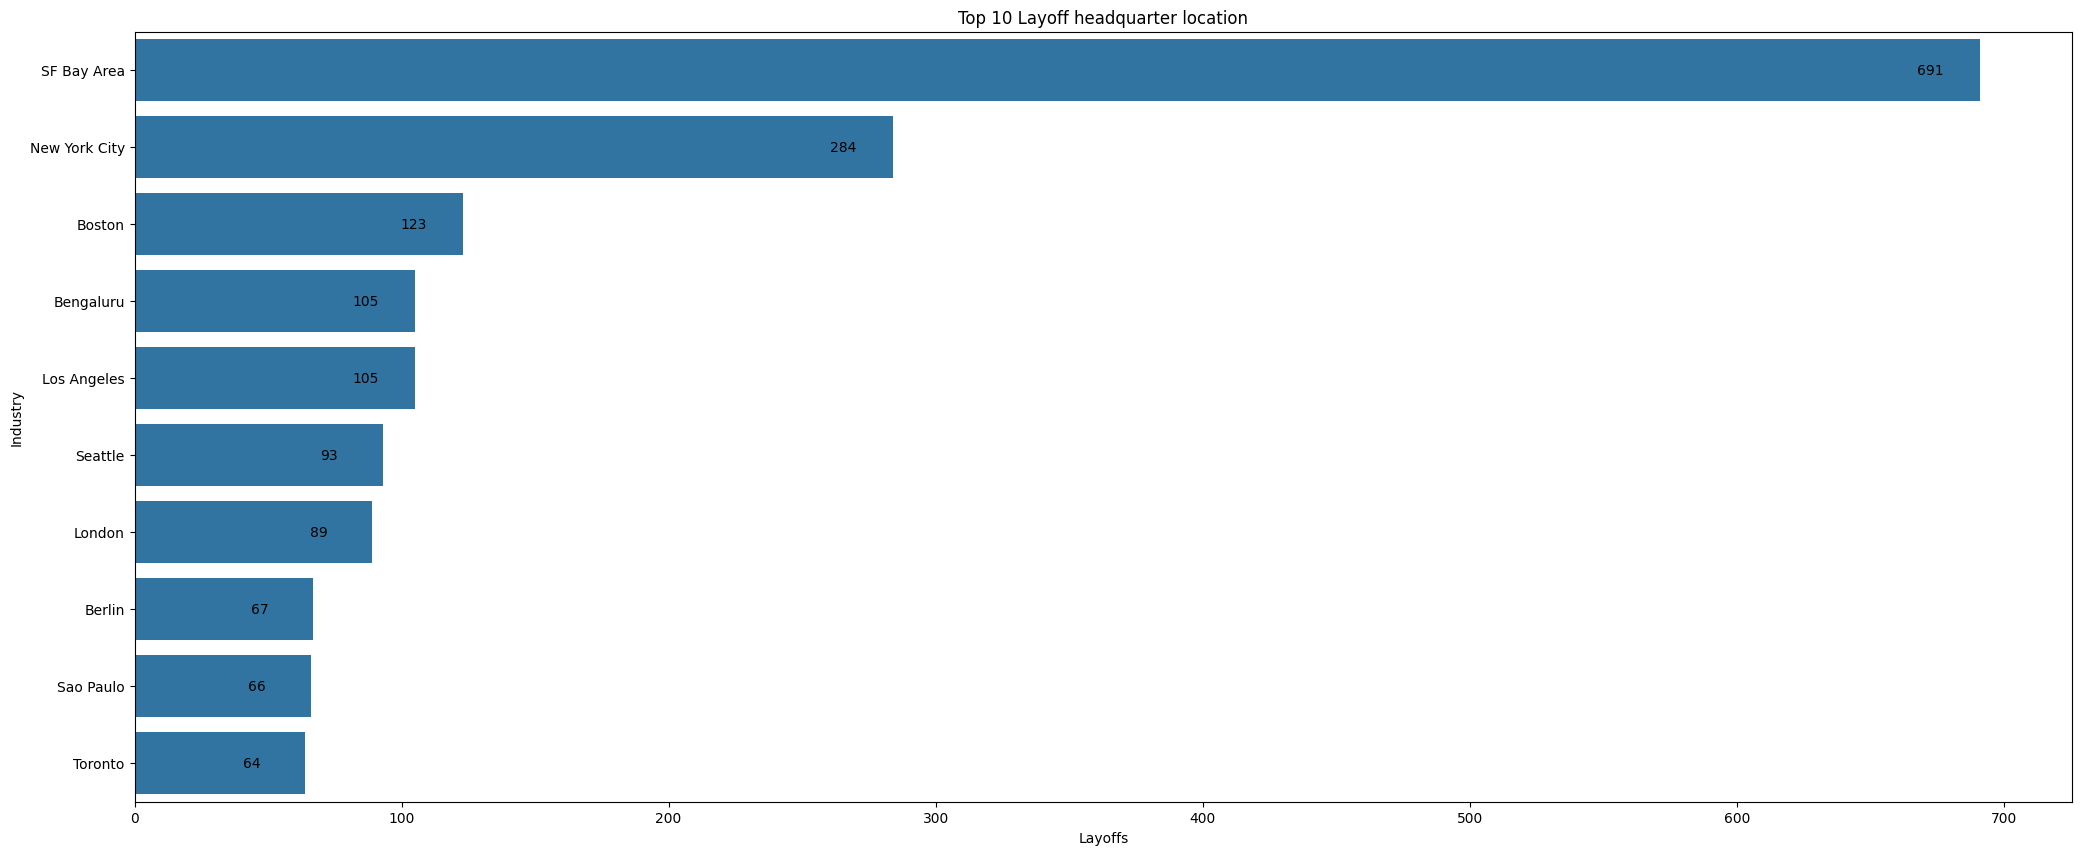

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
top_10_industries = data['Location_HQ'].value_counts().head(10)
top_10_industries = data.groupby('Location_HQ').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()
p=sns.barplot(y='Location_HQ',x=0, data=top_10_industries,ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-45)
plt.title("Top 10 Layoff headquarter location")
plt.xlabel('Layoffs')
plt.ylabel('Industry')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
p=sns.countplot(x="status",  data=data,
              ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-40)
plt.title("Private vs Public Layoffs")
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.show()

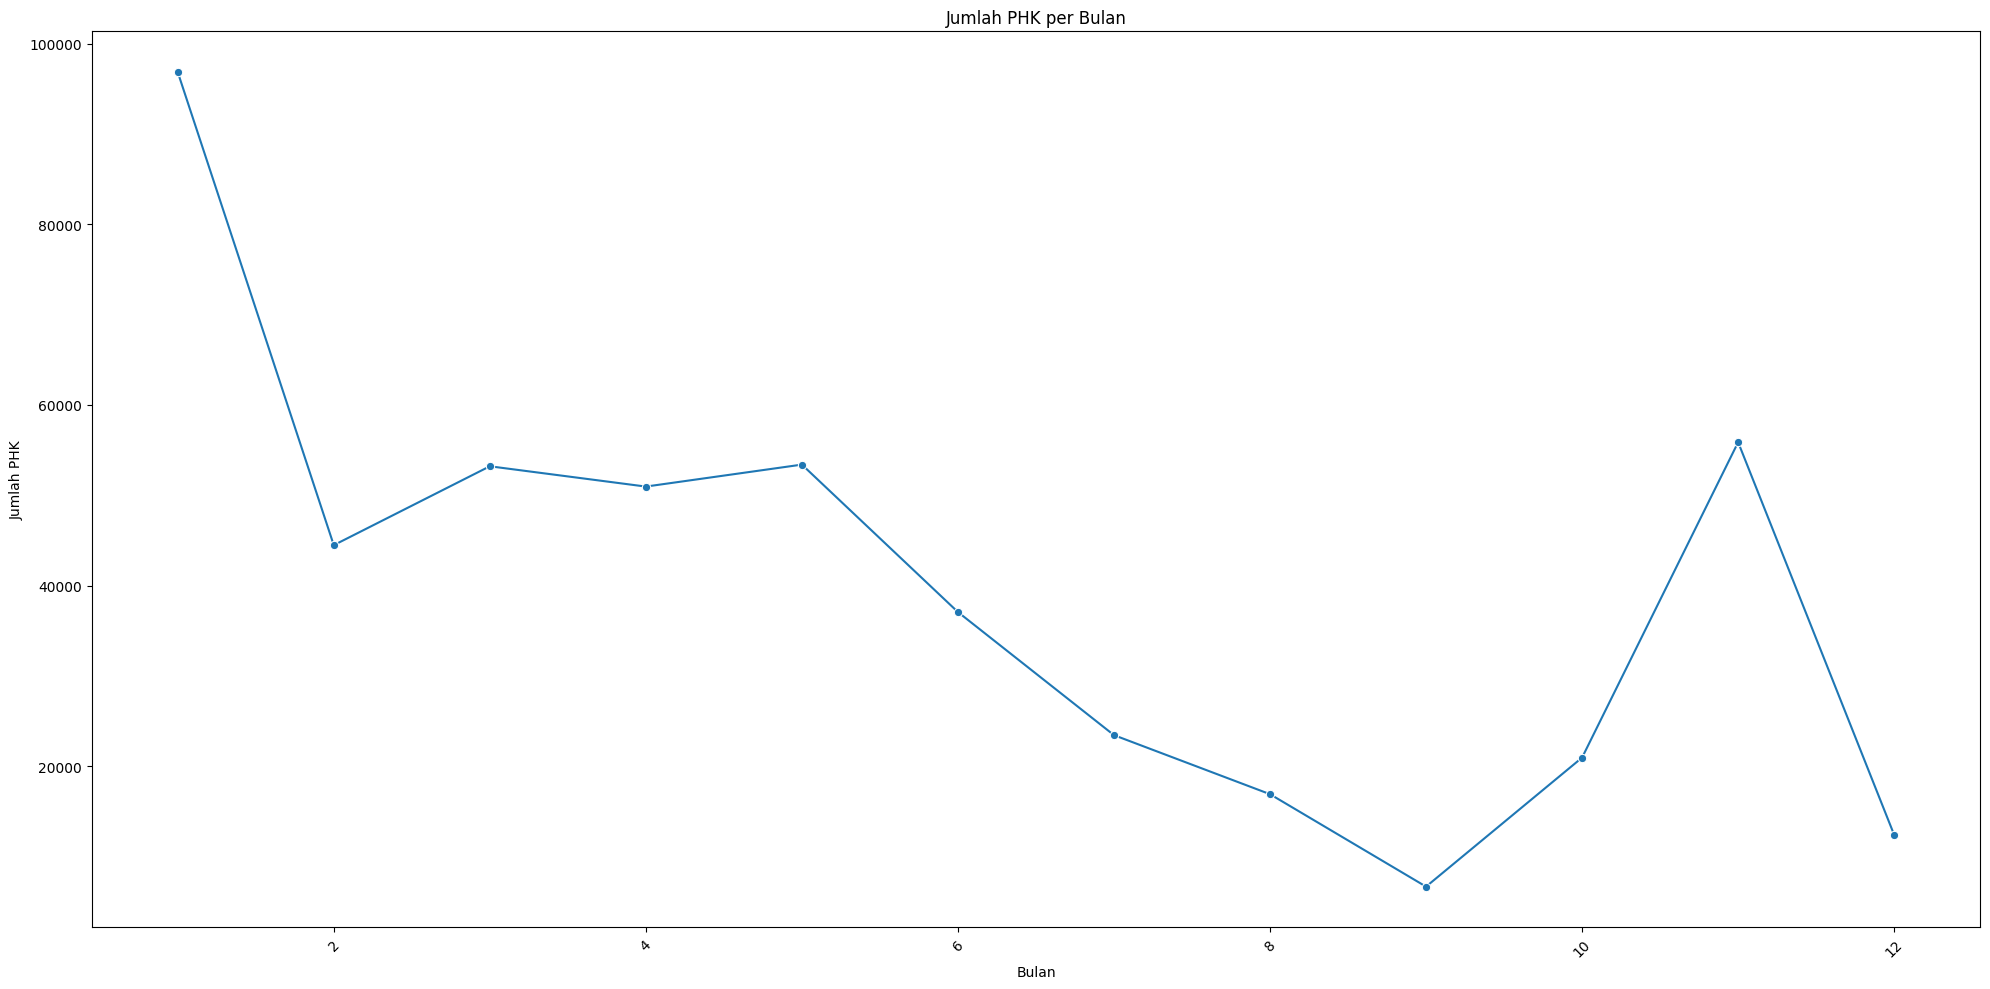

In [ ]:
monthly_layoffs = data.groupby("month")["Laid_Off_Count"].sum().reset_index()

plt.figure(figsize=(20,10))
sns.lineplot(data=monthly_layoffs, x="month", y="Laid_Off_Count", marker='o')
plt.xticks(rotation=45)
plt.title("Jumlah PHK per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah PHK")
plt.tight_layout()
plt.show()